## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

## Load Data

In [2]:
data = pd.read_csv('.\\data\Iris.csv', index_col='Id')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
data.columns = ['SL', 'SW', 'PL', 'PW', 'Species']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
data.isnull().sum()

SL         0
SW         0
PL         0
PW         0
Species    0
dtype: int64

In [7]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### EDA

In [8]:
df = data.copy()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SW,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PL,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
df.groupby(['Species']).mean()

,SL,SW,PL,PW
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [11]:
df.groupby(['Species']).std()

,SL,SW,PL,PW
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


<IPython.core.display.Javascript object>


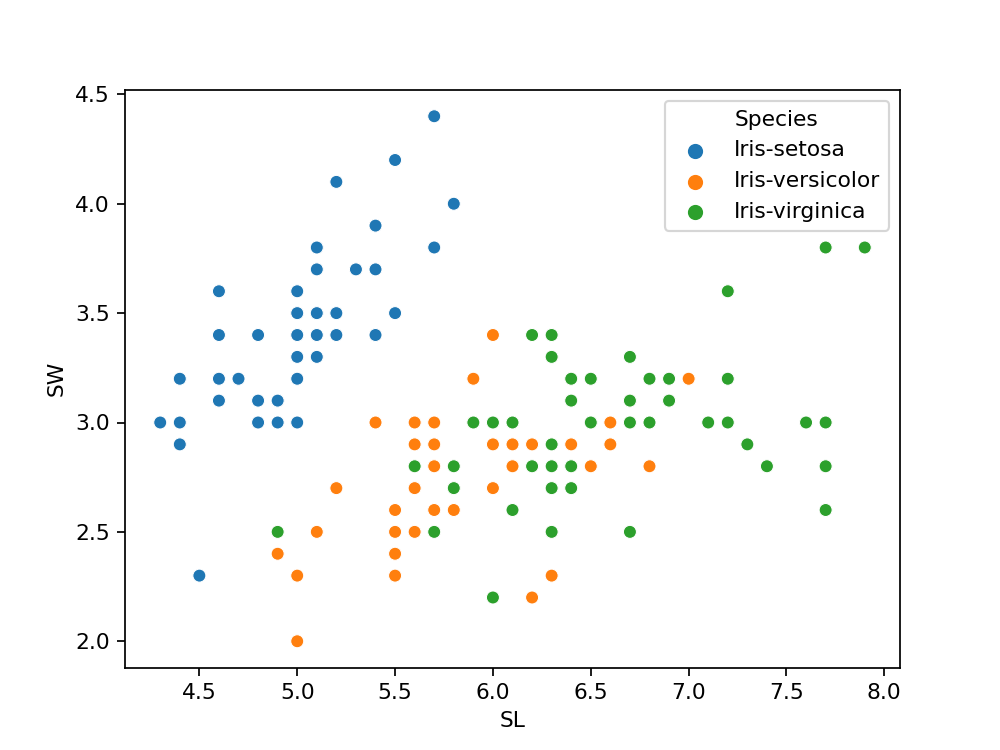

<AxesSubplot:xlabel='SL', ylabel='SW'>

In [12]:
sns.scatterplot(data=df, x='SL', y='SW', hue='Species')

<IPython.core.display.Javascript object>


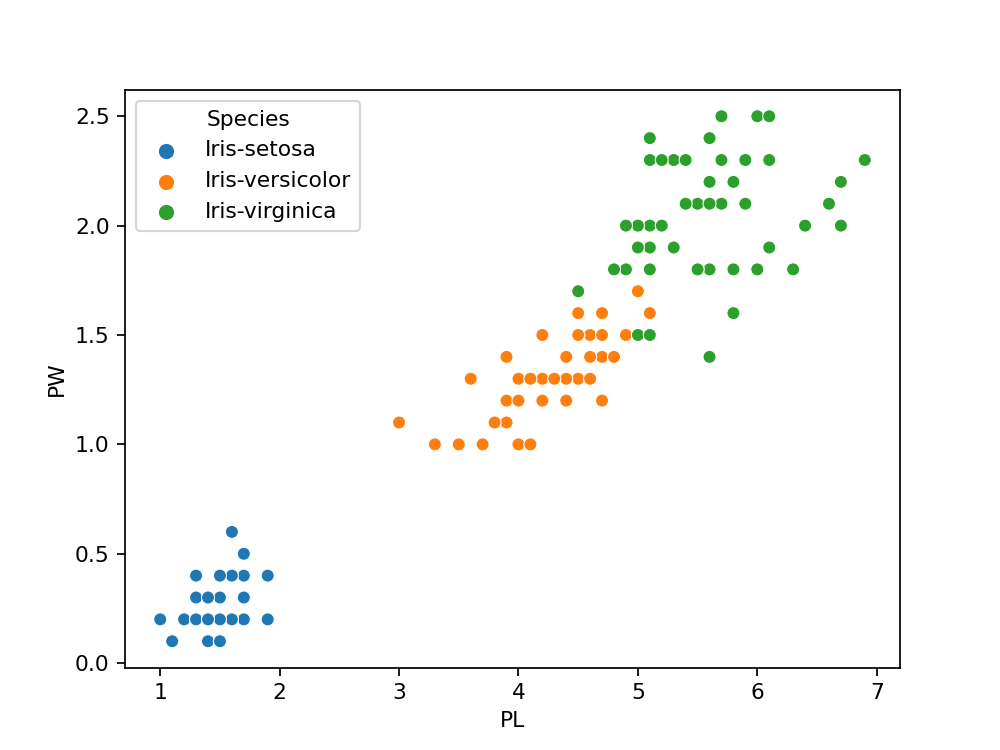

<AxesSubplot:xlabel='PL', ylabel='PW'>

In [13]:
sns.scatterplot(data=df, x='PL', y='PW', hue='Species')

<IPython.core.display.Javascript object>


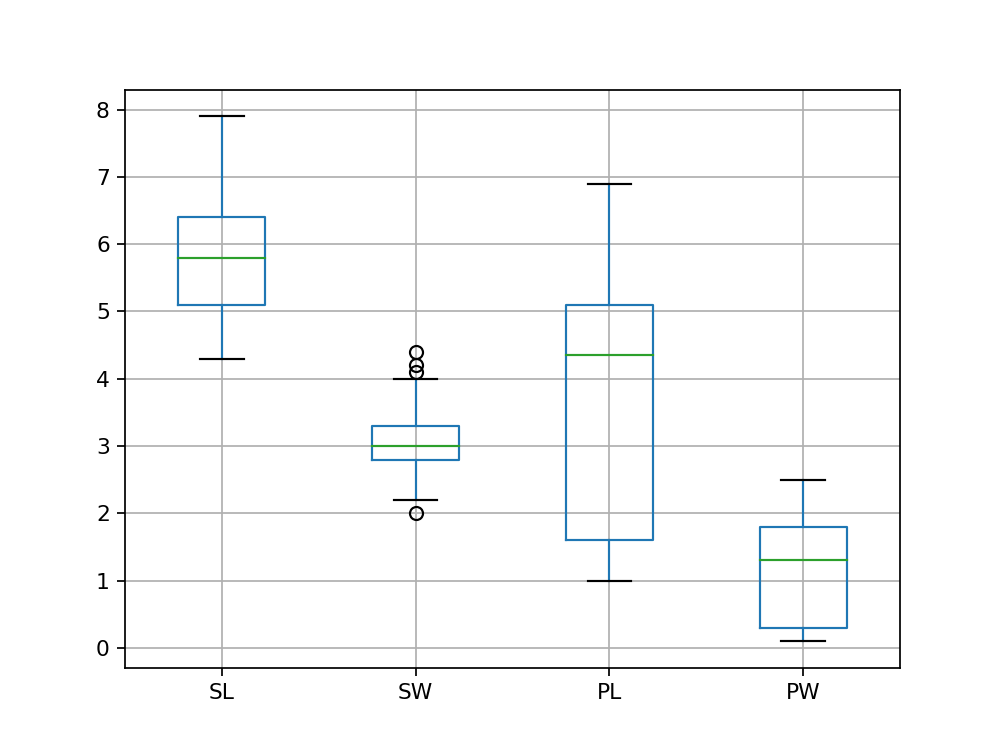

<AxesSubplot:>

In [14]:
df[['SL', 'SW', 'PL', 'PW']].boxplot()

### Feature Engineering 

#### Label encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()
df.Species = encoder.fit_transform(df.Species)

#### Standarization

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sclaer = StandardScaler()
df[['SL', 'SW', 'PL', 'PW']] = sclaer.fit_transform(df[['SL', 'SW', 'PL', 'PW']])

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,-4.736952e-16,1.003350,-1.870024,-0.900681,-0.052506,0.674501,2.492019
SW,150.0,-6.631732e-16,1.003350,-2.438987,-0.587764,-0.124958,0.569251,3.114684
PL,150.0,3.315866e-16,1.003350,-1.568735,-1.227541,0.336266,0.762759,1.786341
PW,150.0,-2.842171e-16,1.003350,-1.444450,-1.181504,0.133226,0.790591,1.710902
Species,150.0,1.000000e+00,0.819232,0.000000,0.000000,1.000000,2.000000,2.000000


#### Train and Test Split

In [58]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    df[['SL', 'SW', 'PL', 'PW']], df.Species, test_size=0.2, random_state=42
)

In [59]:
xtrain.shape

(120, 4)

In [60]:
xtest.shape

(30, 4)

#### Feature Selection

In [61]:
from sklearn.feature_selection import mutual_info_classif

scores = mutual_info_classif(
     xtrain[['SL', 'SW', 'PL', 'PW']], ytrain, random_state=42
)

In [62]:
scores

array([0.46447913, 0.1653158 , 0.98233202, 0.96322298])

In [63]:
scores_df = pd.DataFrame(scores)
scores_df.index = ['SL', 'SW', 'PL', 'PW']
scores_df.columns = ['Scores',]
scores_df.sort_values(by='Scores', ascending=False, inplace=True)

<IPython.core.display.Javascript object>


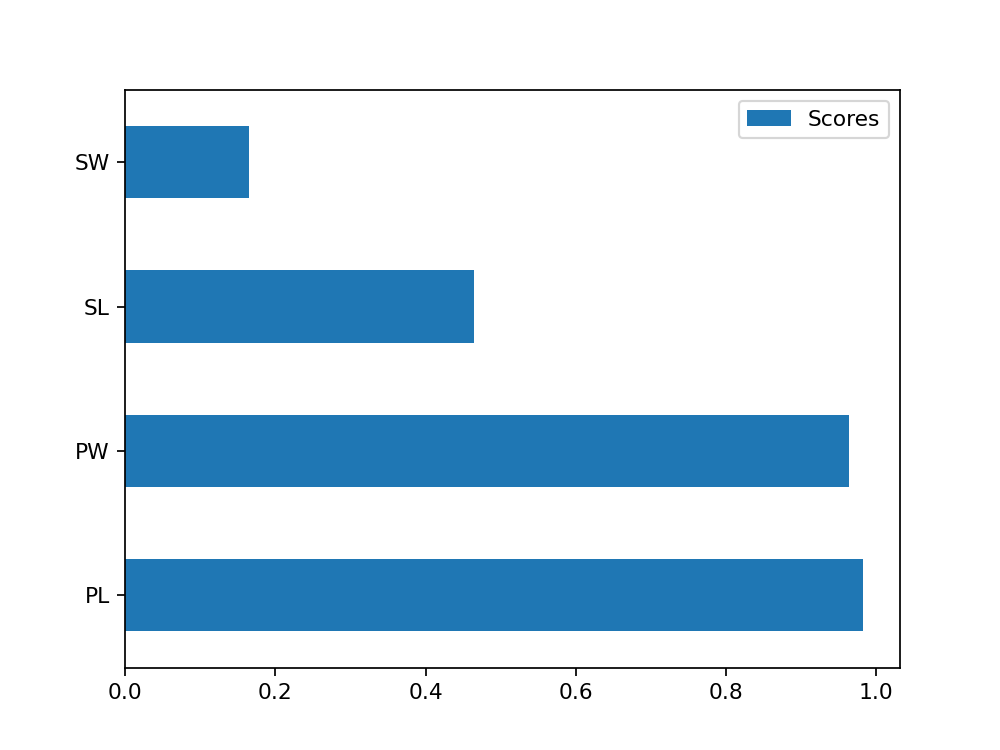

<AxesSubplot:>

In [64]:
scores_df.plot(kind='barh')

### KNN Model

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier()
knn.fit(xtrain[['PL', 'PW']], ytrain)

KNeighborsClassifier()

In [67]:
ypredTrain = knn.predict(xtrain[['PL', 'PW']])
ypredTest =knn.predict(xtest[['PL', 'PW']])

In [68]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [74]:
cm1 = confusion_matrix(y_true=ytrain, y_pred=ypredTrain)

In [70]:
accuracy_score(ytrain, ypredTrain)

0.9666666666666667

In [75]:
cm2 = confusion_matrix(y_true=ytest, y_pred=ypredTest)

In [72]:
accuracy_score(ytest, ypredTest)

1.0

<IPython.core.display.Javascript object>


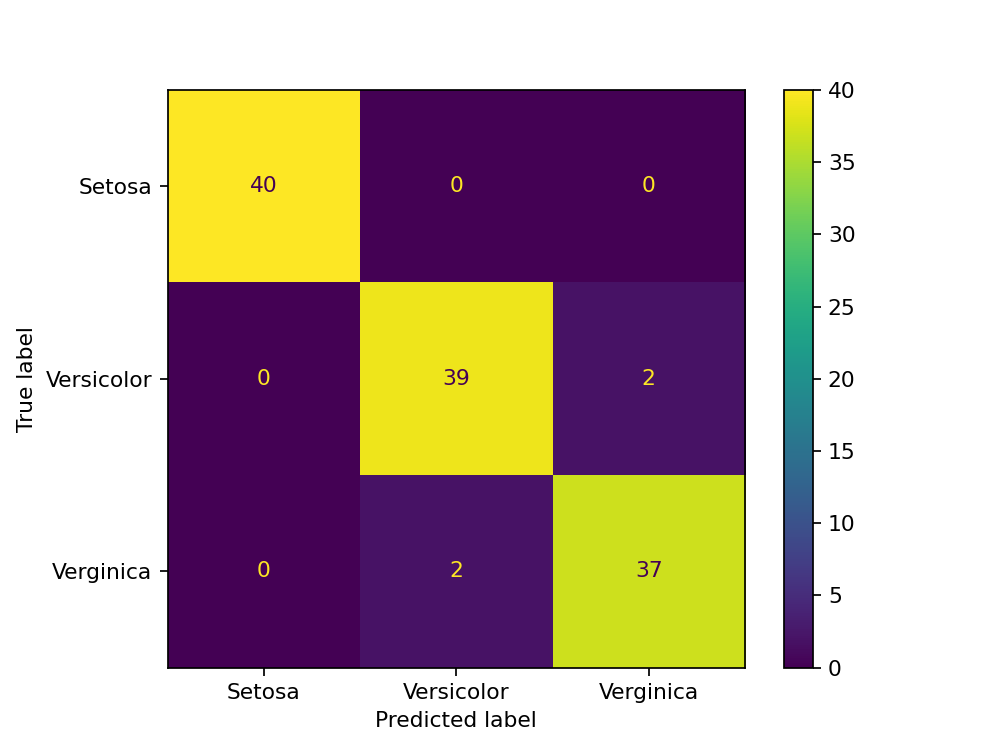

In [83]:
cmd1 = ConfusionMatrixDisplay(cm1, display_labels=['Setosa', 'Versicolor', 'Verginica'])
cmd1.plot()

<IPython.core.display.Javascript object>


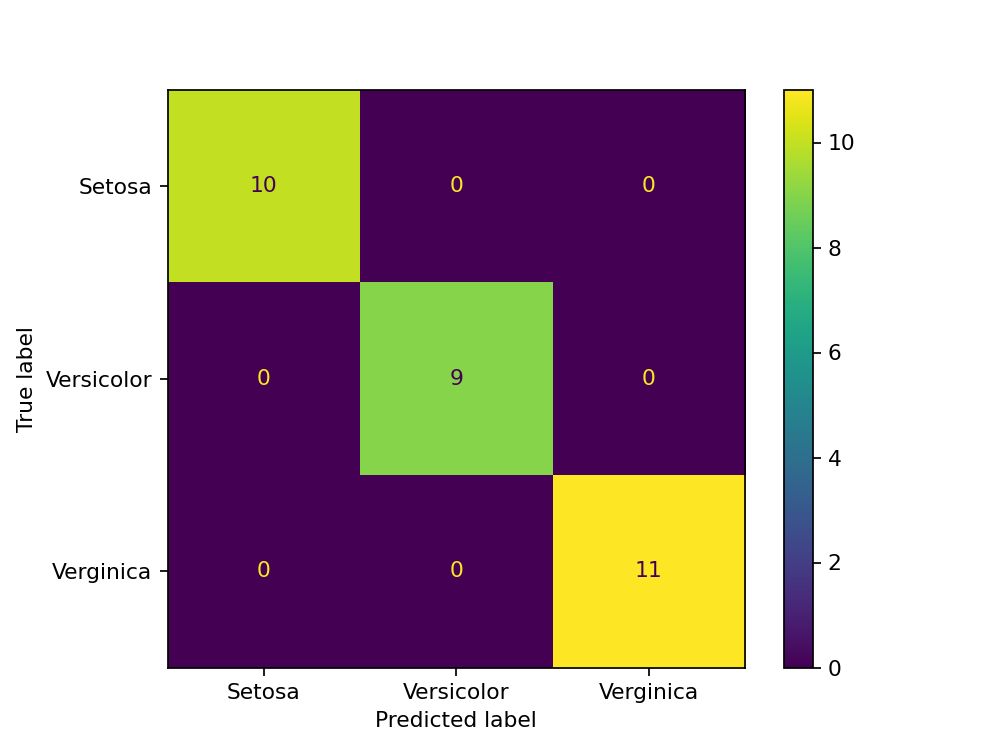

In [84]:
cmd2 = ConfusionMatrixDisplay(cm2, display_labels=['Setosa', 'Versicolor', 'Verginica'])
cmd2.plot()

In [88]:
cr1 = classification_report(ytrain, ypredTrain)
print(cr1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.95      0.95        41
           2       0.95      0.95      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [89]:
cr2 = classification_report(ytest, ypredTest)
print(cr2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Vizualization

In [92]:
df[['PL', 'PW']].describe().T

,count,mean,std,min,25%,50%,75%,max
PL,150.0,3.315866e-16,1.00335,-1.568735,-1.227541,0.336266,0.762759,1.786341
PW,150.0,-2.842171e-16,1.00335,-1.444450,-1.181504,0.133226,0.790591,1.710902


In [97]:
x1, x2 = np.meshgrid(
    np.arange(-1.568735, 1.786341, 0.01), np.arange(-1.444450, 1.710902, 0.01)
)

In [100]:
features = np.c_[x1.ravel(), x2.ravel()]
preds = knn.predict(features)

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [116]:
predGrid = preds.reshape(x1.shape)

<IPython.core.display.Javascript object>


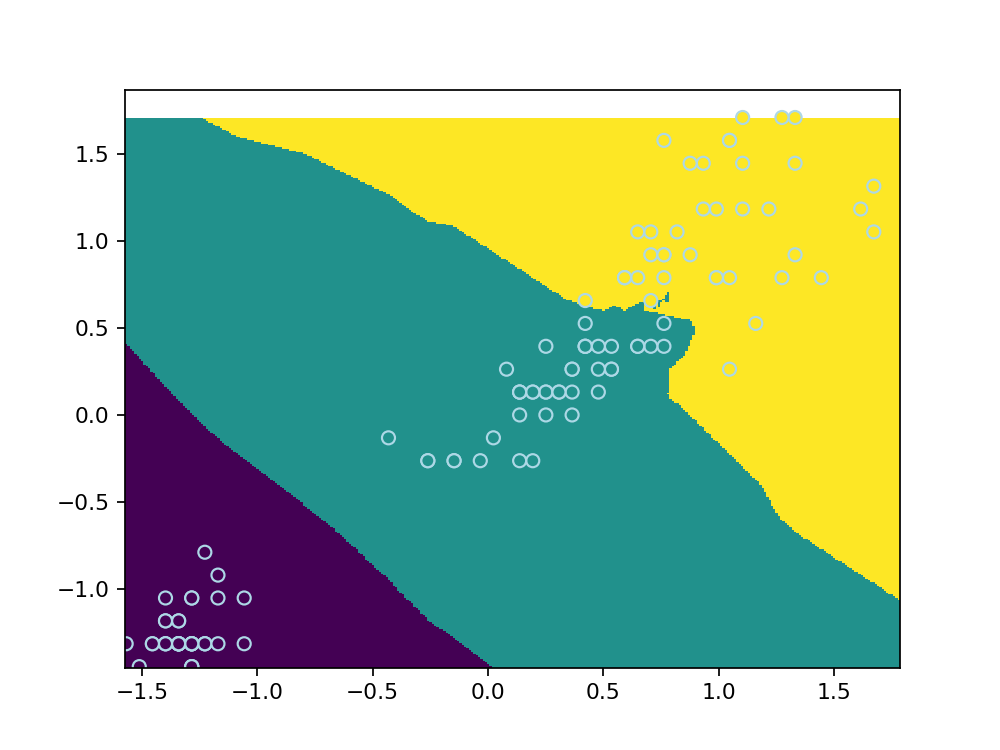

In [122]:
plt.figure()
plt.pcolormesh(x1, x2, predGrid)
plt.scatter(xtrain['PL'], xtrain['PW'], c=knn.predict(xtrain[['PL', 'PW']]), edgecolor='lightblue')
plt.show()

In [120]:
xtrain['PL']

Id
23    -1.568735
16    -1.284407
66     0.364699
12    -1.227541
43    -1.398138
         ...   
72     0.137236
107    0.421564
15    -1.455004
93     0.137236
103    1.217684
Name: PL, Length: 120, dtype: float64

In [114]:
x1.shape, x2.shape

((316, 336), (316, 336))